In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Loading the data set

data = pd.read_csv ("/content/Insurance.csv")
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.shape

(1338, 7)

In [ ]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


At this point, there are no null values. The object type has three columns: "Sex," "Smoker," and "Region."The next step is to turn those values into numerical data.

In [ ]:
# Changing the datas to Numeric datas

data['sex'] = data['sex'].astype("category")
data['sex'] = data['sex'].cat.codes

data['smoker'] = data['smoker'].astype("category")
data['smoker'] = data['smoker'].cat.codes

data['region'] = data['region'].astype("category")
data['region'] = data['region'].cat.codes

In [ ]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


Divide the data into independent and dependent categories. This regret model is multilinear. "Charges" is the dependent variable, whereas the other variables are independent.

In [ ]:
X = data.drop(columns = "charges")
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [ ]:
Y = data["charges"]
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In machine learning, splitting data refers to dividing an available dataset into distinct groups based on specific criteria or proportions. Train-Test Split: The dataset is divided into a training set and a testing set. The training set is used to train the model, while the testing set is used to assess the model's performance. The regular split is 70-80% for training and 20-30% for testing, but this may vary depending on the size of the dataset and the specific use case

In [ ]:
# Splitting Data
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split (X,Y,test_size = 0.3,random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

The intercept and regression coefficients are essential components of a linear regression model. The intercept represents the value of the dependent variable when the independent variable is zero. It is the point where the regression line crosses the y-axis. The regression coefficient, on the other hand, represents the rate at which the dependent variable changes with respect to the independent variable. It is the amount by which the dependent variable changes when the independent variable increases by one unit

In [23]:
c = lr.intercept_
c

-11827.733141795718

In [24]:
m = lr.coef_
m

array([  256.5772619 ,   -49.39232379,   329.02381564,   479.08499828,
       23400.28378787,  -276.31576201])

In [25]:
# Setting Train Data

Y_pred_train = lr.predict (X_train)
Y_pred_train

array([ 2074.0645306 ,  8141.81393908, 18738.94132528,  7874.86959064,
        6305.12726989,  2023.19725425, 26861.18663021, 14932.93021746,
       10489.56733846, 16254.02800921, 11726.39324257, 11284.0092172 ,
       39312.16870908,  5825.91078917, 12314.92042527,  3164.68427134,
       15406.30681252,  4648.58167988,  5011.79585436,  6012.4796038 ,
       15349.49652486,  8970.97358853,  8780.43012222, 34229.60622887,
        6700.80932636, 26943.25864121, 27280.48004482, 15477.83837581,
        8825.62578924, 34394.38378457, 10177.85528603,  3901.18161227,
       15608.58732963, 29584.76846515, 29453.37088923, 28132.67012427,
       10003.22154888, 33049.08935397,  3963.45204974, 25461.54857001,
        5656.76892592, 27993.86773531,  7049.4472544 , 15100.38851758,
        2552.92266861, 35458.5756605 , 15250.90732084,  3190.28483443,
        1768.85441295, 10155.17603664,  9937.89476088, 11225.91583863,
       16776.25691816,  4332.14442527,  1904.56473771,  4169.01766783,
      

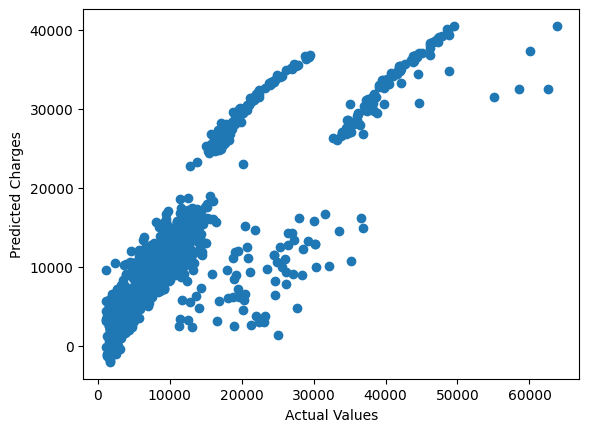

In [26]:
plt.scatter(Y_train,Y_pred_train)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Charges")
plt.show()

 R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that’s explained by an independent variable or variables in a regression model. It is also known as the coefficient of determination. R2 ranges from 0 to 1, where 0 indicates that the model does not fit the data at all, and 1 indicates that the model fits the data perfectly. In other words, the higher the R2 value, the better the model fits the data

In [27]:
from sklearn.metrics import r2_score
r2_score (Y_train,Y_pred_train)

0.7306840408360217

In [28]:
# Setting Test Data

Y_pred_test = lr.predict(X_test)

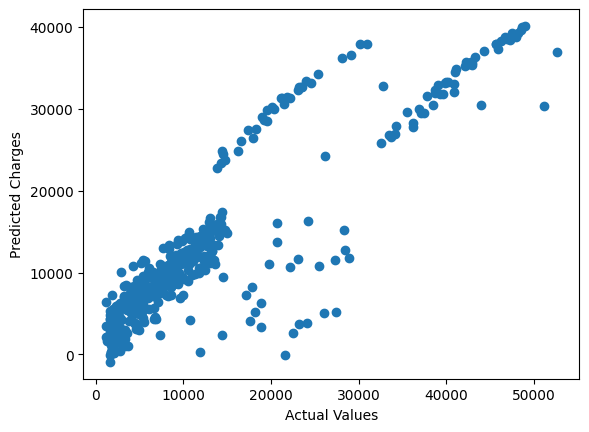

In [29]:
plt.scatter(Y_test,Y_pred_test)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Charges")
plt.show()

In [30]:
r2_score(Y_test,Y_pred_test)

0.7911113876316933

An R2 score of 0.73 for the training data and 0.79 for the test data is considered good. It indicates that the model is able to explain a significant proportion of the variance in the dependent variable and is able to generalize well to new data
